<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Recommender Systems with Python
## (Optional and additional topic in the course)

Hi Guys, <br>
Very warm welcome to the Recommender Systems with Python lecture!<br>

In this section, we are going to develop and Recommendation System that will suggest an item to the user, based on the similarity of a particular item, according to his/her interests. Please note, this will be a very basic Recommendation System to suggest similar items. <br>

&#9989; I want to mention that the skill-set in Recommendation Systems could lead you to a very rewarding career that you can built on this course. Once again, this is an optional topic in this course, however, based on the demand, I may put a complete course on developing true robust recommendation system in the near future. At this stage, the purpose of this topic is to make you realize that the knowledge you are getting from this course is unique, and can take you in variety of rewarding and in demand careers!<br>

Regarding the project in this lecture, we will be working with movielens dataset. The dataset consist of two `.csv` files, `movies.csv` and `ratings.csv`. If you want, you can directly downloaded these files from [the provided link](https://grouplens.org/datasets/movielens/). However, for your convenience , both of the files are are provided as a part of this course. At the end of this notebook, links to few other datasets are also provided, you can explore them if you really get interested in the recommender systems! <br>

**Good Luck** <br>

**Let's start with some important imports!**

&#9758; <font style="font-size:12px;color:green;"> According to the grouplens.org:<br>
*These datasets will change over time, and are not appropriate for reporting research results. We will keep the download links stable for automated downloads. We will not archive or make available previously released versions.*<br> </font>

In [1]:
import numpy as np
import pandas as pd

We need to read the data files, let's read them first!

In [2]:
movies = pd.read_csv('movies.csv')

In [3]:
ratings = pd.read_csv('ratings.csv')

So, always good to check the head of the data!

In [4]:
movies.head()
#ratings.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


So, in the movies dataset, we have movieId, the name or title of the movie and its category/genre!<br>

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In the ratings dataset, we have userId, movieId, rating that the movie got from a specific user, and the timestamp at which the movie got rating from the user. <br>

If we look at both `ratings` and `movies` datasets, movieId column is a common column. Let's merge the dataframes on movieId and output the `head()` of the merged data. 

In [6]:
df = pd.merge(ratings, movies, on='movieId')

In [7]:
# let's check the head of our dataframe 
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


Now, we have a single dataframe with moveId and its tiles as two separate columns!<br>
If you want, you can drop the genre column, we will not use this column in this project!<br>

## Let's do some pre-processing on the data now!

The first thing we can do, we can create a dataframe that tells us average rating for the movie and number of ratings the movie got!<br>
To do this, recall, the `groupby` method, we can use this method here! <br>

&#9758; We need to `groupby` the movies on `title` and then grab the `rating` column to get its mean, so that we have the mean rating of each movie. We can also use `sort_values(ascending = False)` to re-arrange the entries from higher to lower mean rating and then check the head of dataframe, all in a single line code.<br>
Let do it!

In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Burn Up! (1991)                                     5.0
Absolute Giganten (1999)                            5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)    5.0
Erik the Viking (1989)                              5.0
Reality (2014)                                      5.0
Name: rating, dtype: float64

&#9989; There is an important situation to consider in the above `groupby` operation, while getting the `mean` rating.<br>

* What if only 1 or 2 persons have watched a movie and gave a 5 stars rating to it! 
* On the other hand, there could be a movie that got a good number of ratings between 1 and 5 stars. The average in such situation will be less then 5 but the number of watcher are higher!<br>

Remember, this could be the case in our data, we may want to check the movies with number of ratings now.<br>

&#9758; Once again, `groupby` on title and grab the `ratings` column. Instead of `mean`, we want `count` for this task. We can again use `sort_values(ascending = False)` to order the entries and check the head of our dataset.<br>
Let's do this!

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

It looks like the top 5 famous movies don't have the 5 star average rating. <br>
This is fine, you can imagine, if the movie, e.g. Forrest Gump got 341 ratings, all ratings must be 5 star to get average value of 5. <br>
Many of us may not know even the name of the movie with average 5 star rating, but, most of us might be familiar with the movies with most number of ratings, such as Start Wars in the list on number 5!<br>

Let's create a new dataframe `rating`, in which we group the movies with their mean or average rating. Once again, we are going to use `groupby` on title and grab the rating columns to get its mean. 

In [10]:
rating = pd.DataFrame(df.groupby('title')['rating'].mean())

In [11]:
rating.head()

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000


So, in the above dataframe, we got the average rating for each movie in rating column and name of the movie in title column. This does not make much sense for the movies who got several number of rating as compare to those who got very few!<br>
We need to look at the number of ratings as well. <br>
So, let's create another column `n_ratings` that tell us the number of ratings for each movie. Once again, groupby operating with count on the rating column!

In [12]:
rating['n_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
rating.head()

,rating,n_ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


No, we have a dataframe `rating` with three columns `title`, `rating` which is actually average of mean rating, and `n_rating`. <br>




## EDA 
Let's do some EDA now!<br>
We do some imports first.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('white')
%matplotlib inline

To learn from our dataset, let's plot two histograms side-by-side, one for No. of ratings for movies, n_ratings column, and the other for average rating which is rating column in the dataframe!<br>

We can creates two subplots and unpacks the output array immediately!

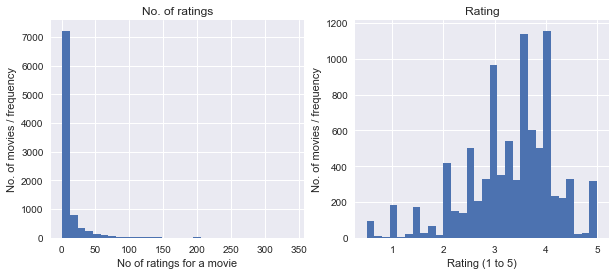

In [14]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# For no. of ratings 
ax1.set_title('No. of ratings')
ax1.hist(rating['n_ratings'], bins =30);
ax1.set_xlabel('No of ratings for a movie')
ax1.set_ylabel('No. of movies / frequency')


# For rating
ax2.set_title('Rating')
ax2.hist(rating['rating'], bins =30);
ax2.set_xlabel('Rating (1 to 5)')
ax2.set_ylabel('No. of movies / frequency')

&#9758; If we look at the "No. of Ratings" on the left, we learn that most of the movies have 0 or 1 number of ratings! So, either, people have not watched those movies and if they have watched, they did not rate them. The first argument somehow make sense, because, most of the time we prefer to watch only the famous movies! <br> 

&#9758; If we look at the "Rating, which is actually the mean rating" on the right, we may find that there are peaks at the whole numbers {1,2,3,4,5}. This is again a usual act, most of the time people rate the things with the whole numbers. <br>
Notice, there are some movies with average 5 star rating, they might be the outstanding movies or may got only few ratings. You can also point out some movies with really bad rating. However, most of the movies got average rating between 3 and 4. <br>

Let's check the relationship between rating and no. of rating with a seaborn `jointplot()`.

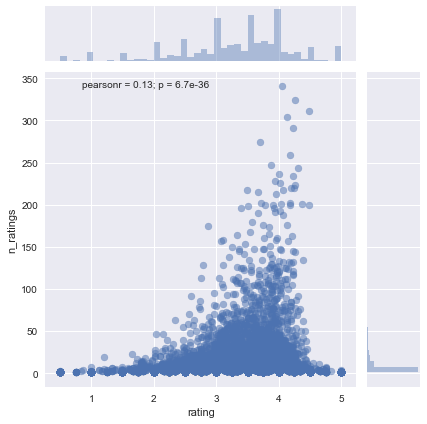

In [15]:
sns.jointplot(x='rating',y='n_ratings',data=rating,alpha=0.5)

The joint plot is is making sense, more the number of rating a movie have, more average rating it gets.<br>
Good the movie is, more people will watch it and the movie will get more number of ratings or reviews. This is a normal act.<br>
We also see from the plot that the 1 or 2 stars movie have very few number of ratings.

## Recommender System for similar movie
Now we got some understanding of our data, let's move on to develop and simple recommender system that can recommend similar movies to the user.<br>

Let's check the head of the original data again.

In [16]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


To move on, let's create a matrix that will have the userId on one axis (index) and the title on another axis (columns) whereas, rating as its value. In the way, each cell will consist of the rating that the user gave to a certain movie. <br>

So, we need userId, title and rating columns for such matrix. We are going to use `pivot_table()` method to get our required matrix. <br>

Our parameter for the `pivot_table()` will be: <br>

* `index = userId` 
* `columns = title`
* `values = rating`

*&#9758; <font style="font-size:12px;color:green;">Remember, if there is no rating for a movie from the user, there will be `NaN`, so **lots of `NaN` values!, right?** *<br></font>

Let's do the task and call the new matrix as `rating_mat`

In [17]:
rating_mat = df.pivot_table(index='userId',
                            columns='title',
                            values='rating')

In [18]:
rating_mat.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As already mentioned, we have lots of missing values, because, most of the people have not watched those movies or, if watched, they have not rated them!<br>


**Let's check the most rated movies once again from our rating dataframne.**

In [19]:
rating.sort_values('n_ratings', ascending=False).head(10)

,rating,n_ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


Let's select any 2 movies, for example:

* No. 1:  **Forrest Gump (1994)** and 
* No. 7:  **Matrix, The (1999)** 

and check there category / genre. <br>

In [20]:
movies[movies['title']=='Forrest Gump (1994)']

,movieId,title,genres
321,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [21]:
movies[movies['title']=='Matrix, The (1999)']

,movieId,title,genres
2062,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


So, the **Forrest Gump (1994) is a Comedy drama movie** where as **Matrix is Sci-Fic Action etc**<br>

Let's grab their rating from our `rating_mat` and check their heads.<br>

We can get the rating for **Forrest Gump (1994) in FG_user_ratings** and rating for **Matrix, The (1999) in Matrix_user_ratings**.

In [22]:
#Getting ratings from rating_mat
FG_user_ratings = rating_mat['Forrest Gump (1994)']
Matrix_user_ratings = rating_mat['Matrix, The (1999)']
#Displaying the heads
FG_user_ratings.head(), Matrix_user_ratings.head()

(userId
 1    NaN
 2    3.0
 3    5.0
 4    5.0
 5    4.0
 Name: Forrest Gump (1994), dtype: float64, userId
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 Name: Matrix, The (1999), dtype: float64)

So, we got the user ratings for the selected movies. <br>
Now, we want to know how these movies are correlated to the other movies in the dataframe. <br>
pandas had a built-in function `corrwith()` which Compute the pairwise correlation between rows or columns of two DataFrame objects. *<font style="font-size:12px;color:green;">(shift+tab for doc string)</font>*.<br>

Let's see how the user rating of Forrest Gump (FG_user_ratings) is correlated with the user rating of all other movies in the `rating_mat`!<br>

We are computing the correlation of **FG_user_ratings** to the user rating or user behavior for all other movies and passing that to **similar_to_FG**. We will also do the same for **Matrix** at the same time!

In [23]:
similar_to_FG = rating_mat.corrwith(FG_user_ratings)#.head(10)
similar_to_matrix = rating_mat.corrwith(Matrix_user_ratings)

/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


*<font style="font-size:12px;color:green;">Don't worry if you get the warning, its just a pandas warning.</font>*<br>

Now, if we display the head of the dataframe for **`similar_to_FG`** and **`similar_to_matrix`**, we will see NaN. <br>

We need to clean the data for null value using `dropna()`. First, We can create a dataframe instead of series so that it look little nicer, and then we will deal with NaN!<br>

In order to create a dataframe, we need to pass `similar_to_FG` and `similar_to_matrix` to pandas `DataFrame()`. We can set the column name as `correlation`!

In [24]:
corr_FG = pd.DataFrame(similar_to_FG, columns = ['correlation'])
corr_FG.head()

,correlation
title,
"""Great Performances"" Cats (1998)",NaN
$9.99 (2008),1.0
'Hellboy': The Seeds of Creation (2004),NaN
'Neath the Arizona Skies (1934),NaN
'Round Midnight (1986),NaN


Let's drop NaN and check the head again!

In [25]:
corr_FG.dropna(inplace=True)
corr_FG.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.044946
(500) Days of Summer (2009),0.624458
*batteries not included (1987),0.603023
...And Justice for All (1979),0.173422


Let's do the same for matrix (similar_to_matrix)

In [26]:
corr_matrix = pd.DataFrame(similar_to_matrix, columns = ['correlation'])
corr_matrix.dropna(inplace=True)
corr_matrix.head()

,correlation
title,
$9.99 (2008),1.000000
"'burbs, The (1989)",0.056624
(500) Days of Summer (2009),0.368837
*batteries not included (1987),0.743955
...And Justice for All (1979),-0.610170


So, in the recently created dataframes (corr_FG and corr_matrix), the index is the title of the movie whereas the correlation column tells how correlated the user rating of Forrest Gump and Matrix are to the user rating of the other movies. <br>
In principle, if we sort our dataframes by correlation, we should get the most similar movies to Forrest Gump and Matrix in order, in the respective dataframes. <br>

Let's see if this works for matrix movie only. (you can do the same for Forrest Gump after this)

In [27]:
corr_matrix.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Project X (2012),1.0
Becket (1964),1.0
"Musketeer, The (2001)",1.0
Allan Quatermain and the Lost City of Gold (1987),1.0
Honeysuckle Rose (a.k.a. On the Road Again) (1980),1.0
Hope and Glory (1987),1.0
Shadow of the Thin Man (1941),1.0
Clean and Sober (1988),1.0
Hotel Transylvania 2 (2015),1.0


This is perfect correlation! you may not heard about most of these movies but the correlation we are getting is perfect. **The results does not make much sense.** <br>

We need to fix this and we know what the reason is. Most likely, these movies are watched only once by the same users who also watched Matrix and rated both with similar stars. <br>

To fix this, we can set a **threshold value for the ratings**<br>
**Let's re-plot a histogram for n_rating to see which could be a good threshold value for no of ratings!**

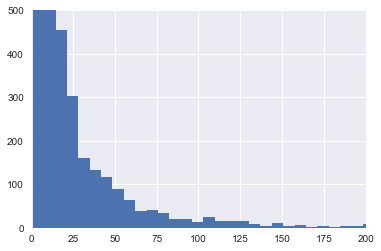

In [28]:
plt.hist(rating['n_ratings'], bins=50);
plt.ylim(0,500);
plt.xlim(0,200);

So, we see that the drop is significant after n_rating = 50.<br>

We can select 50 as a minimum no. of rating in order to be considered into our recommender system. (*you can play with different numbers to see how the results varies)*<br>

Let's sort the value again with the condition (`n_rating >50`) and also join the n_ratings column from `rating` dataframe to `corr_matrix` dataframe and apply the condition for `n_rating > 50`<br>

<font style="font-size:12px;color:green;">*default join is a left join, use calling frame's index (or column if on is specified), this is a good choice here as we have title as index*</font>

In [29]:
corr_matrix = corr_matrix.join(rating['n_ratings'])
corr_matrix.head()

,correlation,n_ratings
title,,
$9.99 (2008),1.000000,3
"'burbs, The (1989)",0.056624,19
(500) Days of Summer (2009),0.368837,45
*batteries not included (1987),0.743955,7
...And Justice for All (1979),-0.610170,13


We need to sort the values in order from high to low!<br>

In [30]:
corr_matrix[corr_matrix['n_ratings']>50].sort_values(
    'correlation',ascending=False).head()

,correlation,n_ratings
title,,
"Matrix, The (1999)",1.000000,259
Star Trek: Generations (1994),0.509976,114
"Prestige, The (2006)",0.458716,52
"Lord of the Rings: The Two Towers, The (2002)",0.451960,188
"Lord of the Rings: The Fellowship of the Ring, The (2001)",0.441993,200


Now the results make much more sense! Matrix has the perfect correlation to itself. The Star Trek is the closely correlated with Matrix!<br>

* Another important thing to remember, lots of time the recommender systems suggest a really popular movie against the popular one you have watched, even if the category is not similar!<br>

Let's do the same for "Forrest Gump"!

In [31]:
corr_FG = corr_FG.join(rating['n_ratings'])
corr_FG[corr_FG['n_ratings']>50].sort_values(
    'correlation',ascending=False).head()

,correlation,n_ratings
title,,
Forrest Gump (1994),1.000000,341
My Big Fat Greek Wedding (2002),0.626240,51
"Beautiful Mind, A (2001)",0.575922,114
"Few Good Men, A (1992)",0.555206,76
Million Dollar Baby (2004),0.545638,65


## Excellent work!
I hope that you have enjoyed the Recommender Systems section. <br>

<br><br><br><br><br><br>
## Interested to learn and play with more dataset to develop you own Recommender Systems ?

Below are some very useful links to the datasets (*the links are up and working till today, sometimes, they are broken. If you find any link broken, please send me a message or post it in Q & A section. You best bet is to google the dataframe, most of the time you will find the new link and would be able to download the data from there*). <br>The datasets for recommender systems are quote large in most of the cases. You can develop your own Recommender systems and see how the things work on different datasets. 

[Chicago Entree - Food Ratings Data Sets at UCI Repository](http://archive.ics.uci.edu/ml/datasets/Entree+Chicago+Recommendation+Data)

[Nursing Home - Provider Ratings Data Set](http://data.medicare.gov/dataset/Nursing-Home-Compare-Provider-Ratings/mufm-vy8d)

[MovieLens - Movie Recommendation Data Sets](https://grouplens.org/datasets/movielens/) - The one we have used above.

[Yahoo! - Movie, Music, and Images Ratings Data Sets](https://webscope.sandbox.yahoo.com/catalog.php?datatype=r)

[Jester - Movie Ratings Data Sets (Collaborative Filtering Dataset)](http://www.ieor.berkeley.edu/~goldberg/jester-data/)

[Cornell University - Movie-review data for use in sentiment-analysis experiments](http://www.cs.cornell.edu/people/pabo/movie-review-data/)

[Last.fm - Music Recommendation Data Sets](http://www.dtic.upf.edu/~ocelma/MusicRecommendationDataset/index.html)

[National University of Singapore - Scholarly Paper Recommendation](http://www.comp.nus.edu.sg/~sugiyama/SchPaperRecData.html)

[Dating website recommendation (collaborative filtering)](http://www.occamslab.com/petricek/data/)

[Institut für Informatik, Universität Freiburg - Book Ratings Data Sets](http://www.informatik.uni-freiburg.de/~cziegler/BX/)


## Good Luck! 